# Data analysis of *in silico*-generated bottom-up MS data

Marie Locard-Paulet (NNF-CPR) - NordBioMedNet Summer school 2021

  
    

-----------

## Description of the data

Several data sets containing peptide quantities were generated *in silico* from different sets of parameters.

Pipeline for *in silico* data generation:
1. upload a fasta file containing all protein sequences expected in samples
2. define protein quantities that follow expected distribution
3. create samples: 2 conditions with a selected number of replicates
4. define a subset of "regulated" proteins (here 10% of the proteome) with defined fold change between the 2 donditions (here max. log2(fold change) = 2) 
5. remove proteins with low intensity to mimick loss during protein extraction / sample preparation
6. digest protein sequences foloowing cleavage rules of a given peptidase (*i.e.* trypsin)
7. summarize total signal for each protein sequence
8. subject peptides to *in silico* MS analysis (add noise and remove values for peptides under the theoretical level of detection or missing at random in DDA)

-----

## Task 1: Understand the parameters utilised for data generation


### Prepare working space

##### Question:  <ins>In what working directory are you?</ins>

-> See code chunk below :)

In [1]:
# Get the working directory:
getwd()

[1] "/Users/rpk349/Documents/Boulot/GitRepo/InSilicoWorkshop/ForWorkshop"

Make sure that the files you will need for this workshop are in the same folder. If not, you will have to modify the paths in the following scripts. 

#### Load/install packages if needed

In this notebook, we will use `naniar` for the vis_miss function. 

In [2]:
library(naniar)

If the loading fails, you need to add a code chunck with the command `install.packages()` for the packages you need to install. Run `help("install.packages")` if you need more information on how to use this function.


### Load parameter list

The datasets and corresponding parameters are available in the document "Param.txt".

Click on the cell with the code below and press `shift-enter`


In [3]:
# Open the document:
input_param <- read.table(
  "Param.txt", # path to the "Param.txt" table
  header = T,
  sep = "\t"
)

input_param

PathToFasta,NumReps,QuantNoise,Enzyme,PropMissedCleavages,PercDetectedPep,PercDetectedVal,MSNoise,WrongIDs,FileName
<chr>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
QC_DataAnalysis/fasta_full_yeast.fasta,4,0.250,trypsin,0.01,0.25,0.25,0.125,0.01,../Output/UPS1-like_output/outputMSRun_0058e610684ec695c6270e0b2d50b136.RData
QC_DataAnalysis/fasta_full_yeast.fasta,3,0.250,trypsin,0.20,0.25,0.25,0.125,0.01,../Output/UPS1-like_output/outputMSRun_048050db048368106bbf186941c73399.RData
QC_DataAnalysis/fasta_full_yeast.fasta,3,0.250,trypsin,0.01,0.50,0.50,0.250,0.01,../Output/UPS1-like_output/outputMSRun_124610ef29ced25cab47f99c714546e8.RData
QC_DataAnalysis/fasta_full_yeast.fasta,5,0.250,trypsin,0.01,0.50,0.50,0.125,0.01,../Output/UPS1-like_output/outputMSRun_172345527ddd3d9ec0c3bb1187333f90.RData
QC_DataAnalysis/fasta_full_yeast.fasta,3,0.125,trypsin,0.01,0.50,0.50,0.125,0.01,../Output/UPS1-like_output/outputMSRun_1c206d577b1d7d4eb8fb353eadcaea2f.RData
QC_DataAnalysis/fasta_full_yeast.fasta,4,0.250,trypsin,0.01,0.50,0.50,0.125,0.01,../Output/UPS1-like_output/outputMSRun_29b6275ec6471b7b764b98855f97dcaa.RData
QC_DataAnalysis/fasta_full_yeast.fasta,2,0.250,trypsin,0.01,0.25,0.25,0.125,0.01,../Output/UPS1-like_output/outputMSRun_3908e0568fd69748a0e1a08f8e40d989.RData
QC_DataAnalysis/fasta_full_yeast.fasta,3,0.250,trypsin,0.01,0.50,0.50,0.010,0.01,../Output/UPS1-like_output/outputMSRun_3d9a08477c227536e6a84af8f8ffdec2.RData
QC_DataAnalysis/fasta_full_yeast.fasta,3,0.125,trypsin,0.01,0.25,0.25,0.125,0.01,../Output/UPS1-like_output/outputMSRun_3db1e11221d450ad50433197d9fced24.RData


##### Question:  <ins>How many data sets are available?</ins>

_Answer_ (double-click here to edit the cell)

##### Question:  <ins>What are the parameters common to all data sets and what do these correspond to?</ins>

_Answer_ (double-click here to edit the cell)

##### Question:  <ins>What are the parameters that vary and what do these correspond to?</ins>

_Answer_ (double-click here to edit the cell)



The column `FileName` contains the identified of each output. These are of different types:
 
 * `outputGroundTruth_`: Set of protein sequences present in the initial fasta. 
 * `outputProteoformAb_`: table containing the "ground truth" (input theoretical data with protein accessions, sequences, and quantities). It contains the columns `Regulation_Amplitude` and `Regulation_Pattern` that inform on the status of the protein in terms of regulation (NA or NULL indicates no regulation across the different conditions). At this stage, some proteins were removed because of theoretical losses during sample preparation.
 * `outputMSRun_`: table containing the resulting peptide quantities after *in silico* digestion and MS run. <span style='color:Red'> The peptide data that we will work with is "AfterMSRun". It is a list of 2 tables named "NonEnriched" and "Enriched". We are only interested in the table "NonEnriched" because these data do not contain PTMs. </span>
 
Each data set also contains a list with the parameters associated to the *in silico* data: `Param`.
 
The parameters of interest for this workshop are listed in the second sheet of the excel document `Param.xlsx`. 


------------------

## Objectives

With these data sets, it is possible to explore what impacts bottom-up results and how. For example, it is possible explore:

* what proteins cannot be accurately identified/quantified and why
* what the impact of the experimental noise is on the statistical results
* how many replicates are necessary to identify regulated peptides/proteins given a set of parameters
* what is the minimal amplitude of regulation that is necessary to catch it with a given analysis pipeline

These are only suggestions, it is possible to explore many other aspects/limitations of bottom-data, such as the impact of peptide digestion, PTMs...

#### Add more potential questions here:
(double-click here to edit the cell)

***It is possible to analyse these data in batch and them compare all of them. Here, we will focus on one data set to hilight what can be done. If time allows, you can then create copies of this Jupyter notebook to run this script on other data sets for comparison.***

------------------

## Task 2: load a data set and explore

The files are available in the folder `insilicoData`.

choose an `outputMSRun` file and load it:


In [18]:
# Define the file of interest:
myfile <- "outputMSRun_3d9a08477c227536e6a84af8f8ffdec2.RData" # You can change this ID as you wish during the workshop

pathtodata <- paste0("insilicoData/", myfile)

load(pathtodata)

# There are no modified peptides in these data so we can focus only on the "non enriched" fraction:
AfterMSRun <- AfterMSRun$NonEnriched


##### Question:  <ins>What parameters were used for this data set?</ins>

_Answer_ (double-click here to edit the cell)

You can now explore the `AfterMSRun` table that contains all peptide quantities.

#### Print the head of this table

In [19]:
head(AfterMSRun)

Sequence,Peptide,Start,Stop,MC,MZ1,MZ2,MZ3,Accession,Proteoform_ID,⋯,Regulation_Amplitude,Regulation_Pattern,C_1_R_1,C_1_R_2,C_1_R_3,C_2_R_1,C_2_R_2,C_2_R_3,WrongID,IsMisLocated
<chr>,<list>,<list>,<list>,<list>,<dbl>,<dbl>,<dbl>,<list>,<list>,⋯,<list>,<list>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>
AAAAELNVK,AAAAEINVK,583,591,0,886.5039,443.7556,296.1728,P38156,1,⋯,NA,NULL,32.42283,32.01452,32.34011,NA,31.98333,NA,FALSE,FALSE
AAAAGAGGAGDSGDAVTK,AAAAGAGGAGDSGDAVTK,97,114,0,1446.6866,723.8469,482.9004,P38915,1,⋯,1.097669,"-0.5, 0.5",29.46140,29.56285,NA,30.19771,30.51382,30.62039,FALSE,FALSE
AAAANSGR,AAAANSGR,65,72,0,717.3685,359.1879,239.7944,P39006,1,⋯,0.05230046,"0.5, -0.5",NA,35.76581,35.96814,35.90564,NA,35.56831,FALSE,FALSE
AAAAQDELTGDGTTTVVCLVGELLR,AAAAQDEITGDGTTTVVCLVGELLR,79,103,0,2503.2755,1252.1414,835.0967,P39079,1,⋯,1.733394,"-0.5, 0.5",24.63974,NA,NA,NA,NA,NA,FALSE,FALSE
AAADALSDLELK,AAADALSDLEIK,9,20,0,1216.6466,608.8270,406.2204,P09938,1,⋯,NA,NULL,32.11940,NA,NA,32.25753,31.58990,31.87310,FALSE,FALSE
AAAEETNR,AAAEETNR,40,47,0,861.4108,431.2090,287.8084,P54787,1,⋯,NA,NULL,NA,NA,28.59244,NA,NA,NA,FALSE,FALSE


#### Have a look at the different columns and get to know these data. If you have any question, discuss it with your coworkers.

##### Question:  <ins>What is the class/type of the table and its columns?</ins>

_Answer_ (double-click here to edit the cell)

##### Question:  <ins>How are proteotypic peptides identifyable?</ins>

_Answer_ (double-click here to edit the cell)

In the following chunk, I find and print examples of non-proteotypic peptides:

In [20]:
# Number of unique peptide per protein accession:

NumProt <- sapply(AfterMSRun$Accession, length)

# hist(NumProt, main = "Number of protein accession per sequence", breaks = 60)

# Print non-proteotypic peptide sequences:

head(AfterMSRun[NumProt > 2,])


Sequence,Peptide,Start,Stop,MC,MZ1,MZ2,MZ3,Accession,Proteoform_ID,⋯,Regulation_Amplitude,Regulation_Pattern,C_1_R_1,C_1_R_2,C_1_R_3,C_2_R_1,C_2_R_2,C_2_R_3,WrongID,IsMisLocated
<chr>,<list>,<list>,<list>,<list>,<dbl>,<dbl>,<dbl>,<list>,<list>,⋯,<list>,<list>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>
AHNLATSSK,"AHNIATSSK, AHNIATSSK, AHNIATSSK, AHNIATSSK, AHNIATSSK, AHNIATSSK, AHNIATSSK, AHNIATSSK, AHNIATSSK, AHNIATSSK, AHNIATSSK, AHNIATSSK, AHNIATSSK, AHNIATSSK, AHNIATSSK, AHNIATSSK, AHNIATSSK, AHNIATSSK, AHNIATSSK, AHNIATSSK","396, 396, 396, 396, 396, 396, 396, 396, 396, 396, 396, 396, 396, 396, 396, 396, 396, 396, 396, 396","404, 404, 404, 404, 404, 404, 404, 404, 404, 404, 404, 404, 404, 404, 404, 404, 404, 404, 404, 404","0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0",928.4894,464.7483,310.1680,"P0CX61, Q12472, P0CX64, Q12113, Q07791, Q99303, Q12392, Q12260, P0CX62, P0C2J4, P0C2J3, Q12491, P25384, Q03494, P0CX63, Q12439, Q03483, P25383, Q12501, Q12293","1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1",⋯,"1.844492, NA, NA, NA, NA, NA, NA, NA, NA, 1.220415, NA, NA, NA, NA, NA, NA, 0.385151, NA, NA, NA","-0.5, 0.5, 0.5, -0.5, 0.5, -0.5",39.67722,39.41838,39.50053,39.52640,39.24775,39.72669,FALSE,FALSE
AHNVSTSNNSPSTDNDSLSK,"AHNVSTSNNSPSTDNDSISK, AHNVSTSNNSPSTDNDSISK, AHNVSTSNNSPSTDNDSISK, AHNVSTSNNSPSTDNDSISK, AHNVSTSNNSPSTDNDSISK, AHNVSTSNNSPSTDNDSISK, AHNVSTSNNSPSTDNDSISK, AHNVSTSNNSPSTDNDSISK, AHNVSTSNNSPSTDNDSISK, AHNVSTSNNSPSTDNDSISK, AHNVSTSNNSPSTDNDSISK, AHNVSTSNNSPSTDNDSISK, AHNVSTSNNSPSTDNDSISK, AHNVSTSNNSPSTDNDSISK, AHNVSTSNNSPSTDNDSISK, AHNVSTSNNSPSTDNDSISK, AHNVSTSNNSPSTDNDSISK, AHNVSTSNNSPSTDNDSISK, AHNVSTSNNSPSTDNDSISK, AHNVSTSNNSPSTDNDSISK, AHNVSTSNNSPSTDNDSISK, AHNVSTSNNSPSTDNDSISK, AHNVSTSNNSPSTDNDSISK, AHNVSTSNNSPSTDNDSISK, AHNVSTSNNSPSTDNDSISK, AHNVSTSNNSPSTDNDSISK, AHNVSTSNNSPSTDNDSISK, AHNVSTSNNSPSTDNDSISK, AHNVSTSNNSPSTDNDSISK, AHNVSTSNNSPSTDNDSISK, AHNVSTSNNSPSTDNDSISK, AHNVSTSNNSPSTDNDSISK, AHNVSTSNNSPSTDNDSISK, AHNVSTSNNSPSTDNDSISK, AHNVSTSNNSPSTDNDSISK, AHNVSTSNNSPSTDNDSISK, AHNVSTSNNSPSTDNDSISK, AHNVSTSNNSPSTDNDSISK, AHNVSTSNNSPSTDNDSISK, AHNVSTSNNSPSTDNDSISK, AHNVSTSNNSPSTDNDSISK, AHNVSTSNNSPSTDNDSISK, AHNVSTSNNSPSTDNDSISK, AHNVSTSNNSPSTDNDSISK, AHNVSTSNNSPSTDNDSISK, AHNVSTSNNSPSTDNDSISK, AHNVSTSNNSPSTDNDSISK, AHNVSTSNNSPSTDNDSISK, AHNVSTSNNSPSTDNDSISK, AHNVSTSNNSPSTDNDSISK, AHNVSTSNNSPSTDNDSISK, AHNVSTSNNSPSTDNDSISK, AHNVSTSNNSPSTDNDSISK, AHNVSTSNNSPSTDNDSISK","400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 438, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 438, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400","419, 419, 419, 419, 419, 419, 419, 419, 419, 419, 419, 419, 419, 419, 419, 419, 419, 419, 419, 419, 457, 419, 419, 419, 419, 419, 419, 419, 419, 419, 419, 419, 419, 419, 419, 419, 419, 419, 419, 419, 419, 419, 457, 419, 419, 419, 419, 419, 419, 419, 419, 419, 419, 419","0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0",2074.9319,1037.9696,692.3155,"P0CX72, P0CX73, Q12088, Q12316, P0CX58, P0CX74, Q12414, Q99337, Q12470, Q04711, P0C2I5, P0CX76, P0C2I3, Q12141, P0CX60, P0CX69, P0C2I9, P0CX71, P0CX68, P0CX75, O13535, Q04706, Q12193, Q03856, P0CX70, P0C2I6, P47099, P0CX65, Q12269, P47098, P0CX57, Q6Q5H1, Q12273, Q07793, P47100, Q03619, Q12485, Q04670, Q92392, P0CX59, Q03612, Q12217, P0C2I4, Q12085, Q03855, P0C2I8, O74302, P0CX67, Q03434, P0C2J1, P0C2J0, P0CX66, Q92393, P0C2I2","1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1",⋯,"NA, NA, NA, NA, NA, NA, 0.1650118, NA, NA, NA, NA, NA, NA, 0.2911950, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, 0.3124790, NA, 1.6943225, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, 0

##### Question:  <ins>Can you find some characteristics of non-proteotypic peptides?</ins>

_Answer_ (double-click here to edit the cell)

##### Question:  <ins>Why should we be carefull when working with non-proteotypic peptides?</ins>

_Answer_ (double-click here to edit the cell)

--------

## Task 3: Quality Control

First, we will add a few columns to characterise a bit better the data

##### Question:  <ins>How many peptides are present in total in thes table?</ins>

_Answer_ (double-click here to edit the cell)

##### Question:  <ins>How many protein groups are present in total in thes table?</ins>

_Answer_ (double-click here to edit the cell)

##### Question:  <ins>How many protein groups are present with minimum one proteotypic peptide?</ins>

_Answer_ (double-click here to edit the cell)

#### Add the peptide length and proteotypicity as new columns in your table

In [21]:
peplength <- nchar(AfterMSRun$Sequence)

AfterMSRun$peplength <- peplength
AfterMSRun$isProteotypic <- NumProt == 1

#### Get the quantitative values

In [22]:
quan <- as.data.frame(AfterMSRun[,grepl("^C", names(AfterMSRun))])
row.names(quan) <- AfterMSRun$Sequence

Check the sparcity of the data by visualising missing values

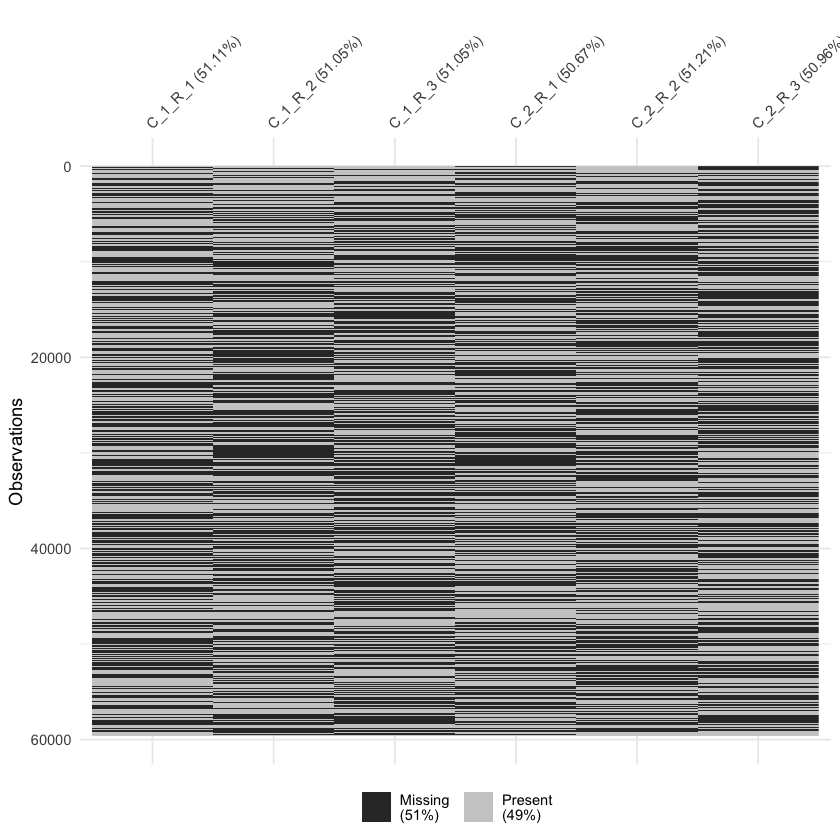

In [23]:
# Visualise missing values:
vis_miss(quan)

Check the normalisation of the data

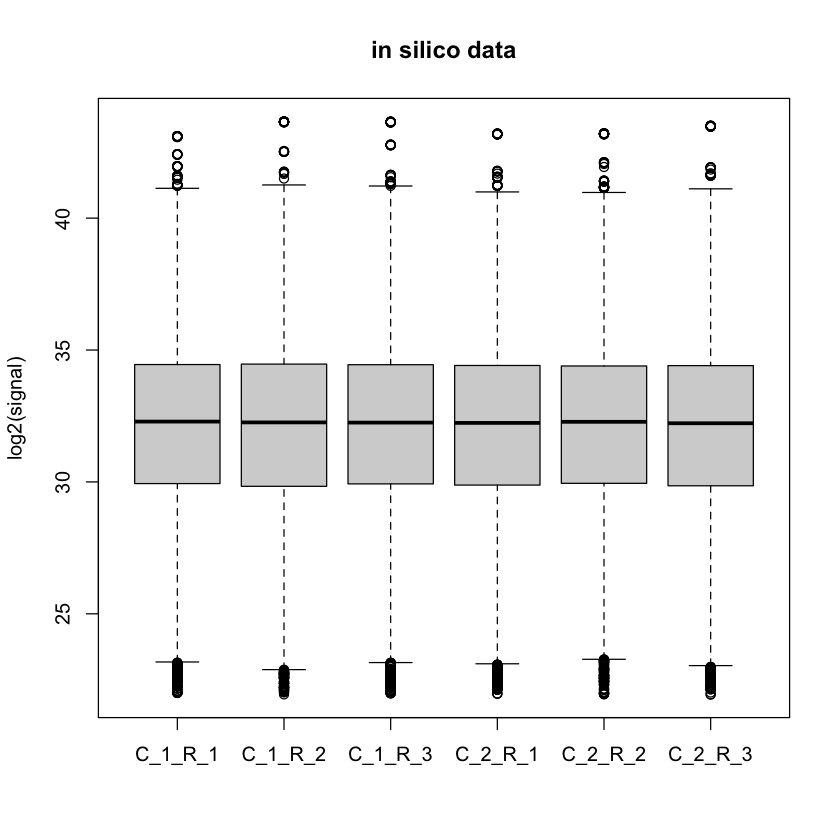

In [24]:
boxplot(quan, main = "in silico data", ylab = "log2(signal)")

----------

## Task 4: Find the proteins regulated according to the ground truth data

##### Question:  <ins>How can we identify the peptides from regulated proteins in the table?</ins>

_Answer_ (double-click here to edit the cell)


In [41]:
regpep <- AfterMSRun$Sequence[!is.na(AfterMSRun$Regulation_Amplitude)]

# Print a subset of the peptides expected to be regulated:
# names(AfterMSRun)
head(AfterMSRun[AfterMSRun$Sequence %in% regpep,c(1:2,9,13:20)])

Sequence,Peptide,Accession,Regulation_Amplitude,Regulation_Pattern,C_1_R_1,C_1_R_2,C_1_R_3,C_2_R_1,C_2_R_2,C_2_R_3
<chr>,<list>,<list>,<list>,<list>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AAAAGAGGAGDSGDAVTK,AAAAGAGGAGDSGDAVTK,P38915,1.097669,"-0.5, 0.5",29.46140,29.56285,NA,30.19771,30.51382,30.62039
AAAANSGR,AAAANSGR,P39006,0.05230046,"0.5, -0.5",NA,35.76581,35.96814,35.90564,NA,35.56831
AAAAQDELTGDGTTTVVCLVGELLR,AAAAQDEITGDGTTTVVCLVGELLR,P39079,1.733394,"-0.5, 0.5",24.63974,NA,NA,NA,NA,NA
AAAENDLK,AAAENDLK,P53222,1.994749,"0.5, -0.5",34.76017,34.94012,35.23109,NA,NA,33.34895
AAAEVLYQYLLMQADLDVLR,AAAEVLYQYILMQADLDVIR,P35729,0.4518527,"-0.5, 0.5",NA,28.18226,28.29010,NA,NA,28.83399
AAAPGLQLVAGEGFQSPLEDR,AAAPGIQLVAGEGFQSPLEDR,Q04697,0.5933055,"0.5, -0.5",NA,NA,34.80216,33.62527,NA,34.22822


#### Compare the expected fold changes with the ones in the output

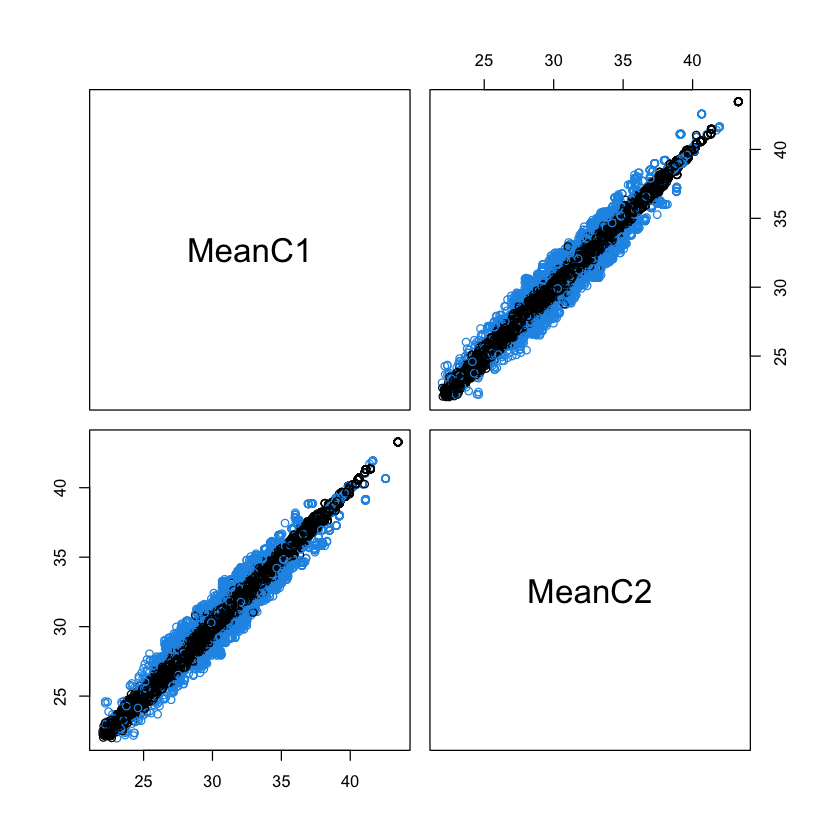

In [26]:
# Calculate mean fold change per condition
AfterMSRun$MeanC1 <- rowMeans(quan[,grepl("^C_1", colnames(quan))], na.rm = T)
AfterMSRun$MeanC2 <- rowMeans(quan[,grepl("^C_2", colnames(quan))], na.rm = T)

pairs(AfterMSRun[,grepl("^Mean", names(AfterMSRun))], col = ifelse(AfterMSRun$Sequence %in% regpep, "4", "1"))

#### Check the standard deviation (or CV) of the calculated fold changes

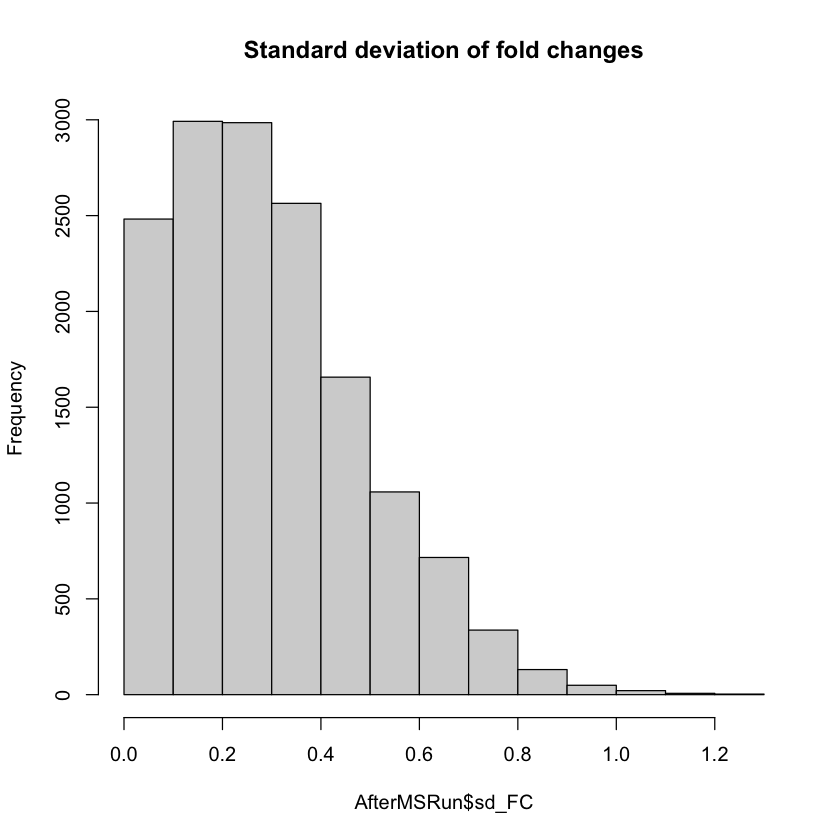

In [27]:
# Calculate the fold changes between the two conditions:
AfterMSRun$FC <- AfterMSRun$MeanC2 - AfterMSRun$MeanC1

# Calculate the standard deviation:
sd_FC <- rep(NA, nrow(quan))

for (r in 1:nrow(quan)) {
  vecval <- rep(NA, ncol(quan) / 2)
  for (c in 1:(ncol(quan)/2)) {
    vecval[c] <- quan[r,(c+ncol(quan)/2)] - quan[r,c]
  }
  sd_FC[r] <- sd(vecval, na.rm = T)
}

# Add these values to the table:
AfterMSRun$sd_FC <- sd_FC

# Plot the corresponding histograms:
hist(AfterMSRun$sd_FC, main = "Standard deviation of fold changes")

------

## Task 5: Perform statistical analysis

#### for each peptide, calculate the p-value of a t-test between condition 1 and condition 2

In [28]:
pval <- rep(NA, ncol(quan))

for (r in 1:nrow(quan)) {
    # get the quantities for each condition:
    vec1 <- as.numeric(quan[r,grepl("^C_1", colnames(quan))])
    vec2 <- as.numeric(quan[r,grepl("^C_2", colnames(quan))])
    # check that there are enough values:
    if (sum(!is.na(vec1) & !is.na(vec2)) >= 2) {
        pval[r] <- t.test(vec1, vec2)$p.value
    }
    else {
        pval[r] <- NA
    }
}

cat("Number of succesful t-tests:", sum(!is.na(pval)), "\n")

Number of succesful t-tests: 15002 


##### Question:  <ins>Why would you not manage to perform succesful t-tests for all the peptides?</ins>

_Answer_ (double-click here to edit the cell)

#### Plot a volcano plot

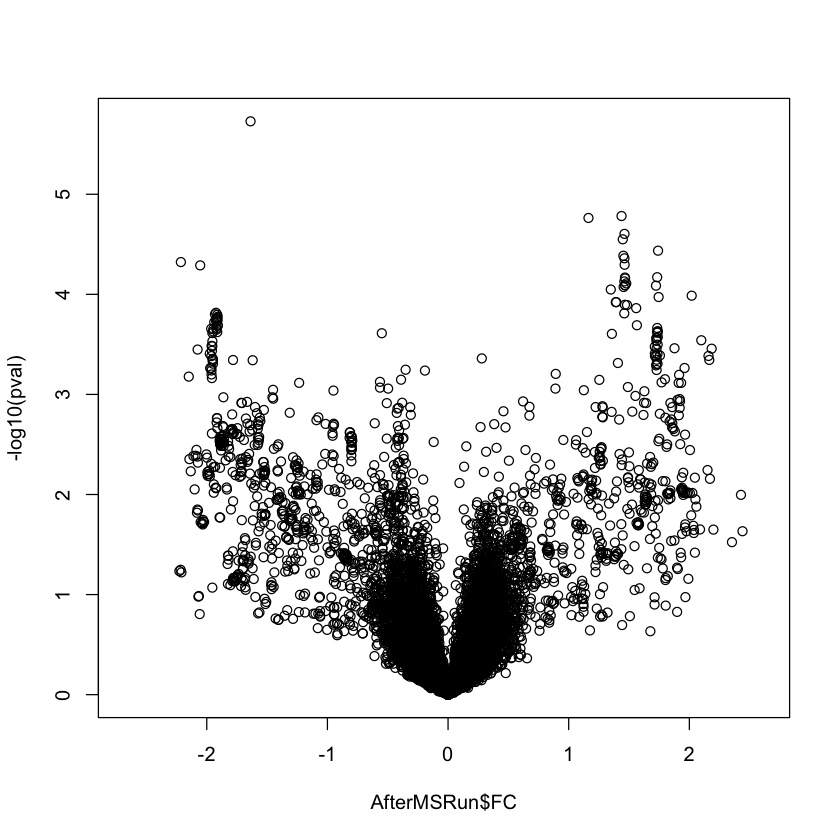

In [29]:
plot(-log10(pval)~AfterMSRun$FC)

##### Question:  <ins>Can you identify the peptides expected to be regulated?</ins>

_Answer_ (double-click here to edit the cell)

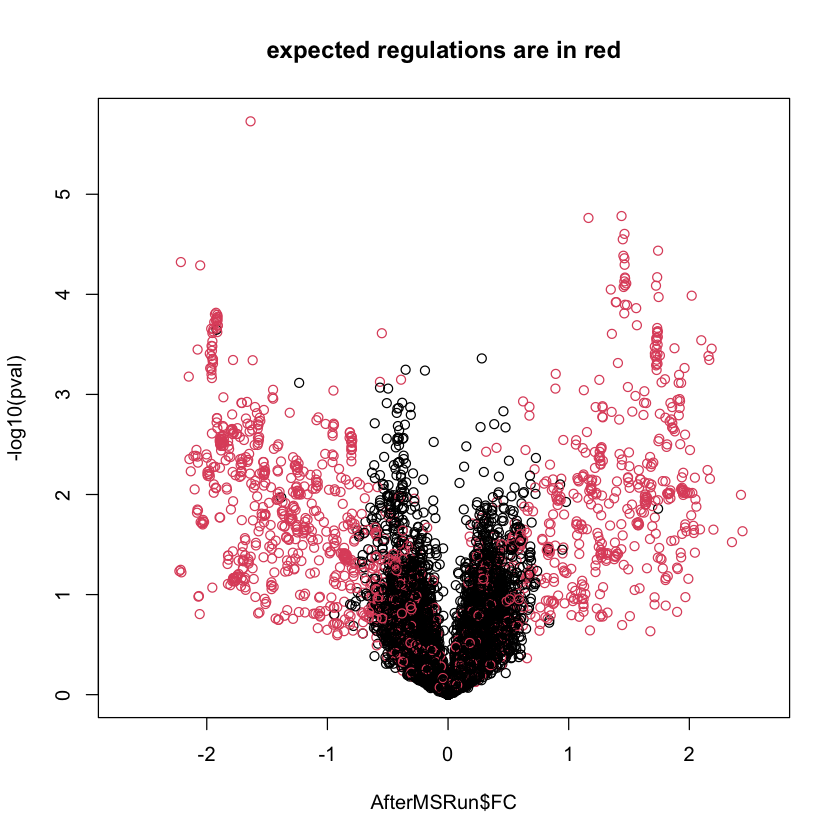

In [30]:
plot(-log10(pval)~AfterMSRun$FC, col = (AfterMSRun$Sequence %in% regpep) + 1, main = "expected regulations are in red")

##### Question:  <ins>What is the number of true and false positive hits that you get in these data?</ins>

_Answer_ (double-click here to edit the cell)

In [39]:
table(ifelse(pval <= 0.01, "hit", "noHit"), ifelse(AfterMSRun$Sequence %in% regpep, "hitInGroundTruth", "NoHitInGroundTruth"))

       
        NoHitInGroundTruth hitInGroundTruth
  hit                   79              479
  noHit              12908             1536

##### Question:  <ins>Can you explore a bit what characterise the false positive hits?</ins>

_Answer_ (double-click here to edit the cell)

In [35]:
# Label the false hits:

AfterMSRun$hit <- ifelse(pval <= 0.01, "hit", "noHit")
AfterMSRun$hitInGT <- ifelse(AfterMSRun$Sequence %in% regpep, "hitInGroundTruth", "NoHitInGroundTruth")

AfterMSRun$FalseHit <- ifelse(AfterMSRun$hitInGT == "NoHitInGroundTruth" & AfterMSRun$hit == "hit", "falseHit", "NA")

# Then up to you...

***You can play around further with this data set, or load another one to compare the results with this one. For example: what happens when you increase/decrease the number of replicates available for this analysis?***|

***Don't hesitate to ask around if you have questions, or want to discuss a specific point of the analysis***